# STOR 535: Lab2
### Submit the PDF version of this homework to gradescope by Feb 18

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

### Simply run the following python script to obtain ``data``.

In [2]:
np.random.seed(42) 
num_flips = 10000

data = np.random.choice([0,1], size=num_flips, p = [0.3, 0.7])

In [3]:
data

array([1, 1, 1, ..., 1, 1, 0])

### 1. Explain in words what the meaning of the above python code? (10 points)

Randomly generate an array of the outcome of 10000 flips, with the probability of getting a 0 being 0.3 and that of getting a 1 is 0.7. The seed is set to 42. 

### 2. Given the vector `data`, print the first 10 elements. Then, explain the meaning of data in the context of flipping a coin. Specifically, describe what each element represents. (5 points)

In [4]:
print(data[:10])

[1 1 1 1 0 0 0 1 1 1]


Each elment is an outcome for the flip. 0 is head and 1 is tail. 

### 3. Use Python to calculate the probability of obtaining the same sequence of outcomes as the first 10 elements in `data` when flipping a fair coin. You can assume that 1 represent head up and 0 represent tail up. Print the probability. (10 points)

Hint: The order of outcome matters.

In [5]:
P3 = 0.5**10
print(f'The probability of obtaining the same sequence of outcomes as the first 10 elements in data when flipping a fair coin is {P3}.')

The probability of obtaining the same sequence of outcomes as the first 10 elements in data when flipping a fair coin is 0.0009765625.


### 4. Use Python to calculate the probability of obtaining the same sequence of outcomes as the first 10 elements in `data` when flipping an unfair coin with head up probability 0.7. Print the probability. (5 points)

Hint: The order of outcome matters.

In [6]:
P4 = 0.3**3 * 0.7**7
print(f'The probability of obtaining the same sequence of outcomes as the first 10 elements in data when flipping an unfair coin is {P4}.')

The probability of obtaining the same sequence of outcomes as the first 10 elements in data when flipping an unfair coin is 0.002223566099999999.


### 5. Suppose that we have 9 coins in a box. Each coin appears identical, but the $i$th coin has probability of landing heads $p_i = 0.1 \times i$ for  $i = 1, 2, \ldots, 9$. We randomly draw one coin from the box (each coin equally likely), then flip it 10,000 times. Let the vector ``data`` in the above question be the outcome.

#### 5.1 Before we flip the coin, what is the prior probability of selecting each type of coin? Visualize this in a bar plot, where the y-axis represents the prior probability, and x-axis represents each type of coin. (10 points)

<BarContainer object of 9 artists>

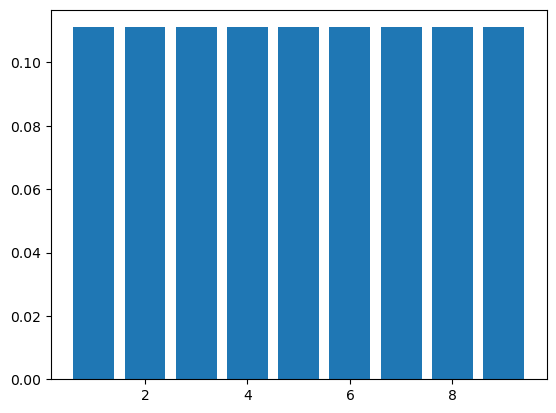

In [7]:
x_values = np.arange(1,10)
P5_1 = [1/9] * 9

plt.bar(x_values,P5_1)

#### 5.2 After we observe the outcome of the first flip in ``data``, what is the posterior probability of coin type? Visualize this in a bar plot. (10 points)

array([0.02222222, 0.04444444, 0.06666667, 0.08888889, 0.11111111,
       0.13333333, 0.15555556, 0.17777778, 0.2       ])

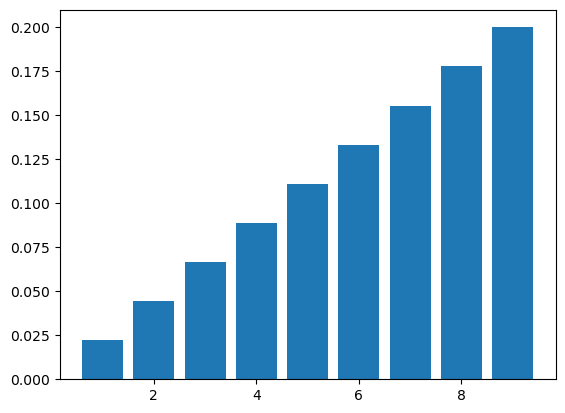

In [8]:
P5_2 = 0.1*x_values/sum(0.1*x_values)
plt.bar(x_values,P5_2)
P5_2

#### 5.3 After we observe the outcome of the first two flips in ``data``, what is the posterior probability of coin type? Visualize this in a bar plot. (10 points)

array([0.00350877, 0.01403509, 0.03157895, 0.05614035, 0.0877193 ,
       0.12631579, 0.17192982, 0.2245614 , 0.28421053])

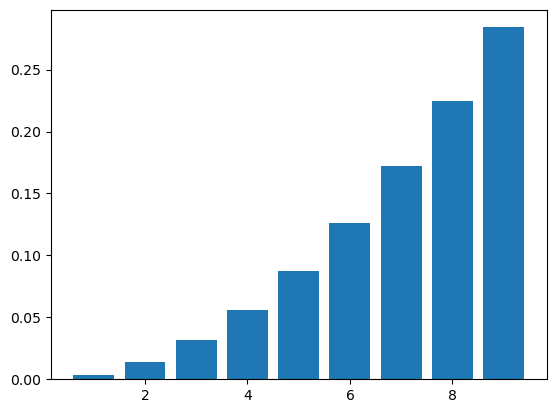

In [9]:
P5_2 = (0.1*x_values)**2/sum((0.1*x_values)**2)
plt.bar(x_values,P5_2)
P5_2

#### 5.4 Define a function called `compute_posterior()` to calculate the posterior probability of these 9 types of coin. The input parameters of the function include:

* A vector of prior probability of each coin.
* A vector of observed sequence of coin flips.
* A vector of head-up probability of each type of coin. (10 points)

In [10]:
def compute_posterior(P_prior, sequence, P_head):
    h = sum(sequence)     #of heads
    #print(f'number of heads is {h}')
    t = len(sequence) - h #of tails
    #print(f'number of tails is {t}')
    P_obs = []
    for i in P_head:
        P = i**h * (1-i)**t   #probability of obtaining the sequence for each of 9 coins
        P_obs.append(P)
    #print(f'probability of obtaining the sequence for each coin is {P_obs}')
    P_post = []
    for i in range(len(P_obs)):
        p = P_prior[i]*P_obs[i]  #probability sequence with prior probability of choosing each coin
        P_post.append(p)
    #print(f'probability accounting the pro of choosing each coin is {P_post}')
    return P_post/sum(P_post)
compute_posterior([1/9]*9, data[:2], 0.1*x_values)

array([0.00350877, 0.01403509, 0.03157895, 0.05614035, 0.0877193 ,
       0.12631579, 0.17192982, 0.2245614 , 0.28421053])

#### 5.5 Use the function `compute_posterior()` to calculate the posterior probability after observing the first 1,2,3,4,5,10, 50, 100, 500, and 1000 flip outcomes in `data`. Print the posterior probability for each case. (10 points)

In [11]:
import pandas as pd

list = [1,2,3,4,5,10, 50, 100, 500, 1000]
outcomes = []
for i in list:
    outcome = compute_posterior([1/9]*9, data[:i], 0.1*x_values)
    outcomes.append(outcome)

dataframe = pd.DataFrame({'observations':list,
             'outcomes':outcomes})
dataframe

,observations,outcomes
0,1,"[0.022222222222222223, 0.044444444444444446, 0..."
1,2,"[0.0035087719298245615, 0.014035087719298246, ..."
2,3,"[0.0004938271604938272, 0.003950617283950617, ..."
3,4,"[6.521880910454576e-05, 0.0010435009456727321,..."
4,5,"[0.00027688047992616523, 0.003937855714505461,..."
5,10,"[9.613263930578787e-06, 0.0008642179217481639,..."
6,50,"[2.0949478656116838e-18, 4.799601261054094e-10..."
7,100,"[1.6510356856912103e-40, 2.221009472875109e-22..."
8,500,"[0.0, 2.246929975115119e-123, 2.23051596813249..."
9,1000,"[0.0, 0.0, 0.0, 0.0, 1.8053359559789604e-29, 1..."


#### 5.6 Create 10 separate bar plots that visualize the posterior probability of each type of coin, given 1,2,3,4,5,10, 50, 100, 500, and 1000 flip outcomes in `data`, respectively. What do you observe? (10 points)

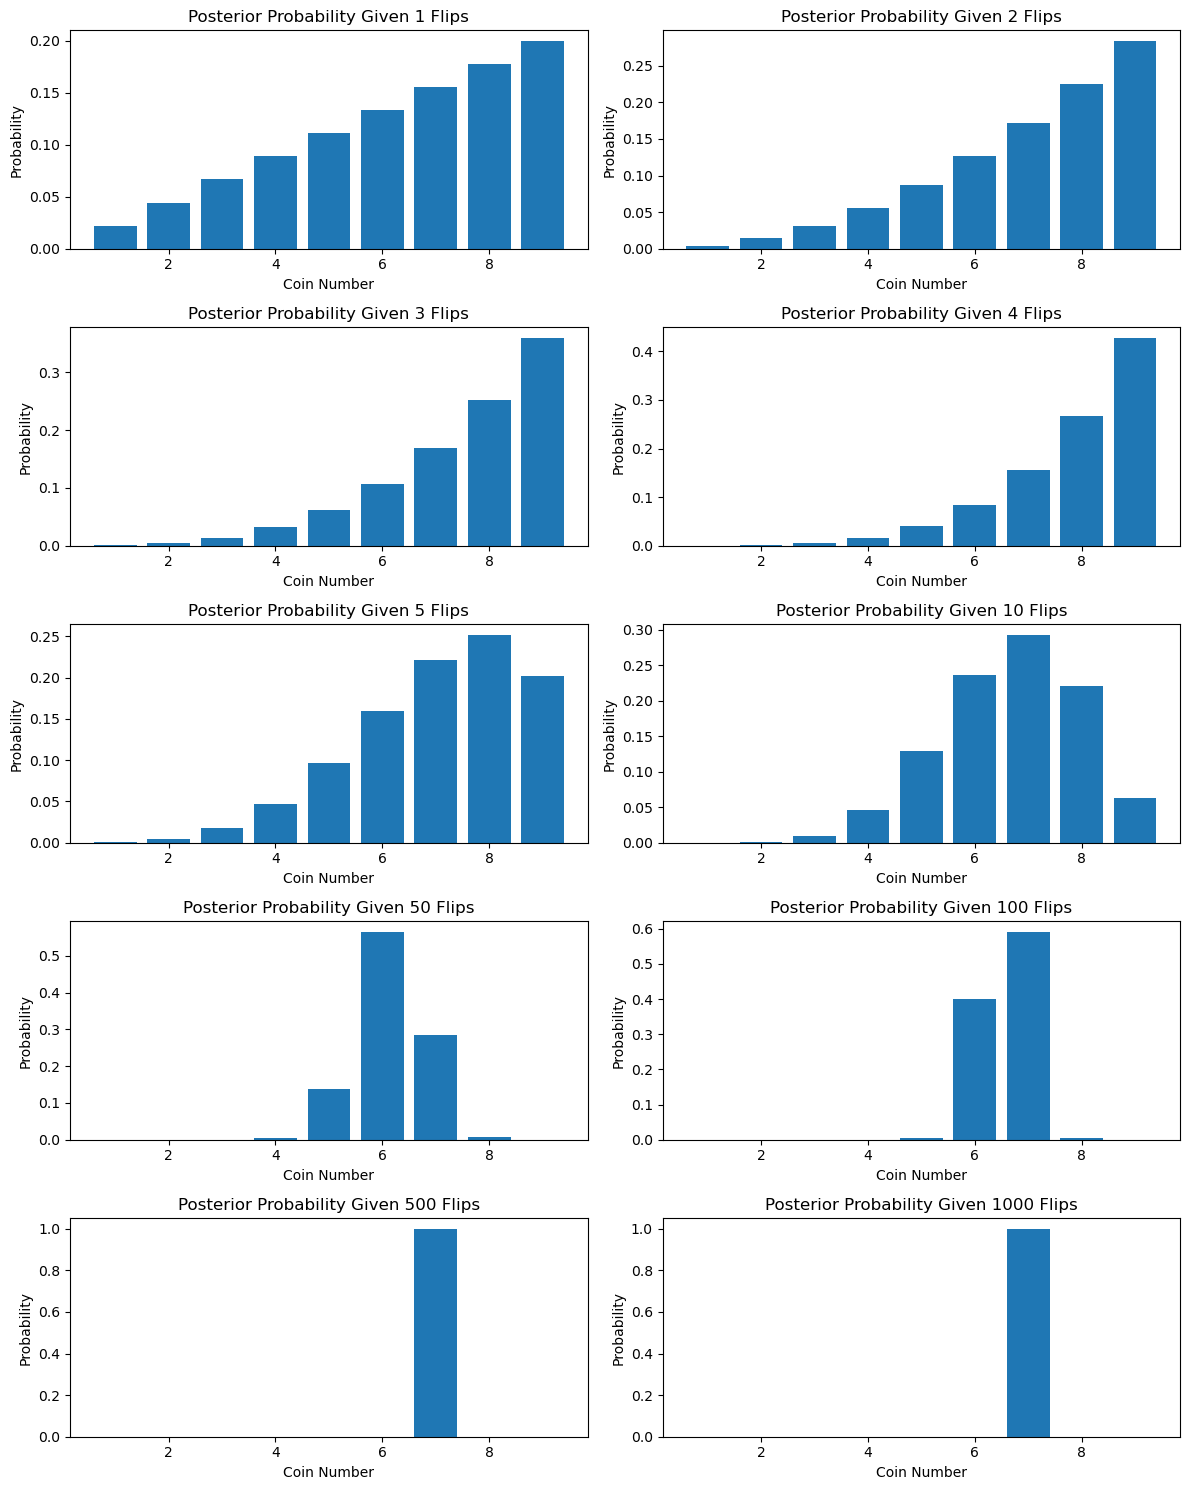

In [12]:
fig, axes = plt.subplots(5, 2, figsize=(12, 15))  

for i, ax in enumerate(axes.flatten()):
    ax.bar(x_values, outcomes[i])  
    ax.set_title(f'Posterior Probability Given {list[i]} Flips')
    ax.set_xlabel('Coin Number')
    ax.set_ylabel('Probability')

plt.tight_layout()
plt.show()

Observations: The probability increase with increase coin number (higher probability for getting a head) for the first 1-4 flips. After 5 flips, the graph increase with coin number, peaks at one coin number then decreases. In most graphs, the probability peaks at coin number 7 (probability of getting a head is 0.7). 

### 5.7 Repeat 5.5 and 5.6 again using `data`, but now the prior probability for each type coin is `[0.05,0.6, 0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]`. In other words, initially, Type 2 coin has a much higher probability of being chosen. What do you observe?  (10 points)

In [13]:
outcomes2 = []
for i in list:
    outcome = compute_posterior([0.05,0.6, 0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05], data[:i], 0.1*x_values)
    outcomes2.append(outcome)

dataframe2 = pd.DataFrame({'observations':list,
             'outcomes':outcomes2})
dataframe2

,observations,outcomes
0,1,"[0.01492537313432836, 0.3582089552238806, 0.04..."
1,2,"[0.00303951367781155, 0.1458966565349544, 0.02..."
2,3,"[0.00047326076668244207, 0.04543303360151444, ..."
3,4,"[6.44786897930234e-05, 0.012379908440260493, 0..."
4,5,"[0.00026538495562173806, 0.045292365759443294,..."
5,10,"[9.522737010702608e-06, 0.010272956258986107, ..."
6,50,"[2.094947854551279e-18, 5.759521482857166e-09,..."
7,100,"[1.6510356856912103e-40, 2.6652113674501305e-2..."
8,500,"[0.0, 2.6963159701381427e-122, 2.2305159681324..."
9,1000,"[0.0, 0.0, 0.0, 0.0, 1.8053359559789604e-29, 1..."


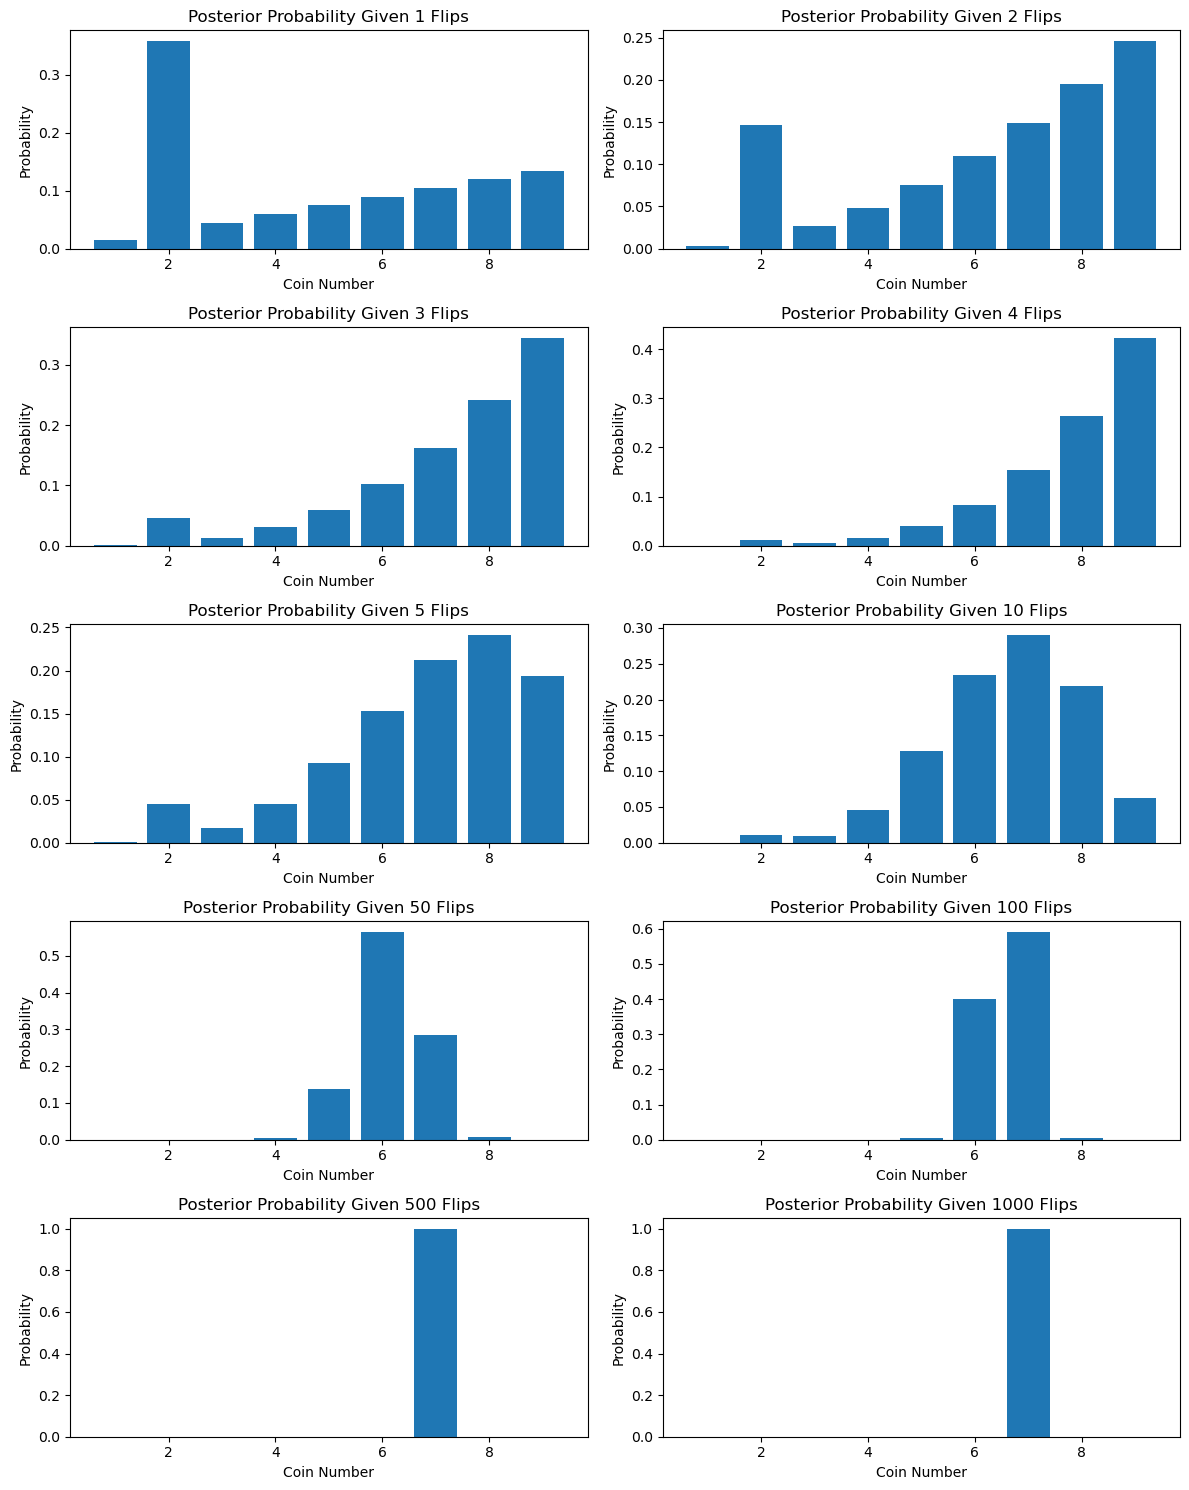

In [14]:
fig, axes = plt.subplots(5, 2, figsize=(12, 15))  

for i, ax in enumerate(axes.flatten()):
    x = x_values  
    ax.bar(x, outcomes2[i])  
    ax.set_title(f'Posterior Probability Given {list[i]} Flips')
    ax.set_xlabel('Coin Number')
    ax.set_ylabel('Probability')

plt.tight_layout()
plt.show()

Observations: Since the probability of getting coin number 2 is higher than other coins, the posterior probability for coin 2 is higher than it was for graph 1 and 2 and is lower for graph 3, 4, 5, and 6 than when the prior probability is the same. It dosen't have any affect on the shape of graph for after 50 flips. Coin 7 remains the one with highest probability.